## Observations and Insights

## Dependencies and starter code

In [80]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import random

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [81]:

# Combine the data into a single dataset

In [82]:
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

In [83]:
#df

## Summary statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [85]:
# create a subset for grouping by

In [86]:
tumor_volume=df[["Drug Regimen","Tumor Volume (mm3)"]]

In [87]:
#getting Describe() statistics

In [88]:
tumor_volume_stat=tumor_volume.groupby("Drug Regimen").describe()

In [89]:
#getting Standard Error (SEM) stats

In [90]:
tumor_volume_sem=tumor_volume.groupby("Drug Regimen").sem()
tumor_volume_sem=tumor_volume_sem.rename({"Tumor Volume (mm3)":"SEM"},axis=1)

In [91]:
#getting Variance
tumor_var=tumor_volume.groupby("Drug Regimen").var()
tumor_var=tumor_var.rename({"Tumor Volume (mm3)":"VAR"},axis=1)
#tumor_var

In [92]:
#merging Describe,SEM dfs and Var df's

In [117]:
tumor_volume_f=pd.merge(tumor_volume_stat,tumor_volume_sem,how="left",on=["Drug Regimen"])

In [118]:
tumor_volume_final=pd.merge(tumor_volume_f,tumor_var,how="left",on=["Drug Regimen"])
#tumor_volume_final

In [119]:
#renaming columns in resulting df

In [120]:
tumor_volume_final.columns=['Count','Mean','STD','MIN','25%','Meidan','75%','MAX','SEM','VARIANCE']
#tumor_volume_final

In [121]:
#Droping unnecessary columns
tumor_volume_final=tumor_volume_final.drop(['MIN','25%','75%','MAX'],axis=1)

In [122]:
#Summary table
tumor_volume_final

,Count,Mean,STD,Meidan,SEM,VARIANCE
Drug Regimen,,,,,,
Capomulin,230.0,40.675741,4.994774,41.557809,0.329346,24.947764
Ceftamin,178.0,52.591172,6.268188,51.776157,0.469821,39.290177
Infubinol,178.0,52.884795,6.567243,51.820584,0.492236,43.128684
Ketapril,188.0,55.235638,8.279709,53.698743,0.603860,68.553577
Naftisol,186.0,54.331565,8.134708,52.509285,0.596466,66.173479
Placebo,181.0,54.033581,7.821003,52.288934,0.581331,61.168083
Propriva,161.0,52.322552,6.507770,50.854632,0.512884,42.351070
Ramicane,228.0,40.216745,4.846308,40.673236,0.320955,23.486704
Stelasyn,181.0,54.233149,7.710419,52.431737,0.573111,59.450562


## Bar plots

In [123]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [124]:
data_point_df=tumor_volume_final[["Count"]]
#tumor_list

In [125]:
data_point_fin=data_point_df.reset_index()


In [159]:
data_point_fin.columns=['Treatment','Count']
#data_point_fin

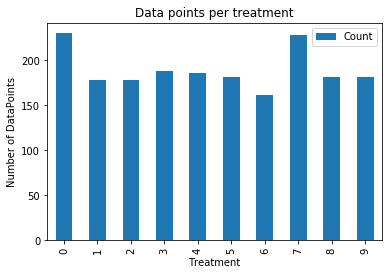

<Figure size 432x288 with 0 Axes>

In [158]:
#ax=data_point_fin.Count.plot(kind="bar",figsize=(5,3),xticks=data_point_fin.index,rot=90)
#ax.set_xticklabels(data_point_fin.Treatment)
data_point_fin.plot.bar()
x_t=data_point_fin['Treatment']
#set title
plt.title("Data points per treatment")
plt.xlabel('Treatment')
#plt.xticks('x_t')
plt.ylabel('Number of DataPoints')
plt.show()
plt.tight_layout()


In [311]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [161]:
#set x axis and Tick locations
x_axis=np.arange(len(data_point_fin))
tick_locations=[x for x in x_axis]

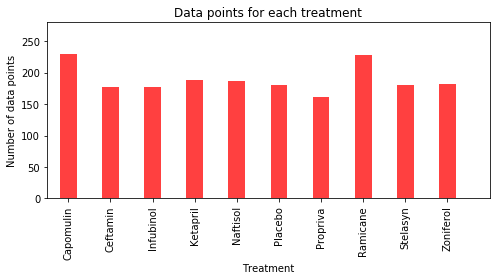

In [173]:
#setting plot
plt.figure(figsize=(7,4))
plt.bar(x_axis,data_point_fin["Count"],color='r',alpha=0.75,width=0.4,align="center")
plt.xticks(tick_locations,data_point_fin["Treatment"],rotation="vertical")
#setting X and y limits
plt.xlim(-0.5,len(x_axis))
plt.ylim(0,max(data_point_fin['Count'])+50)
#set title and labels
plt.title("Data points for each treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of data points")
plt.tight_layout()

## Pie plots

In [314]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [174]:
#df

In [175]:
df_pie=df[["Drug Regimen","Sex"]]
#df_pie

In [317]:
df_pie_group=df_pie.groupby("Sex").count()
df_pie_group.head()

,Drug Regimen
Sex,
Female,935
Male,958


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E74084F6C8>],
      dtype=object)

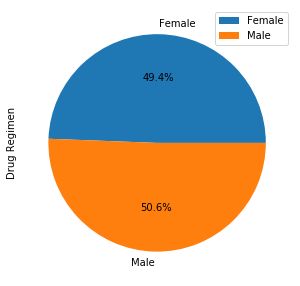

In [318]:
df_pie_group.plot(kind="pie",subplots=True,figsize=(5,5),autopct="%1.1f%%")


In [177]:
df_pie_mat=df[["Drug Regimen","Sex"]]
df_pie_mat.columns=["Drug","Gender"]

In [178]:
df_mat_group=df_pie_mat.groupby("Gender").count()
#df_mat_group

In [179]:

v=df_mat_group.reset_index()
#v

In [180]:
sex=v["Gender"].tolist()
#sex

In [181]:
count=v["Drug"].tolist()
#count

In [324]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

([<matplotlib.patches.Wedge at 0x1d69421e288>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

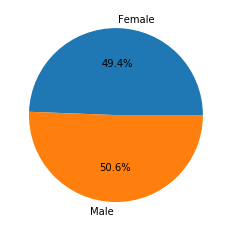

In [185]:
plt.pie(count,labels=sex,autopct="%1.1f%%",startangle=0)


## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

In [215]:
#df[df['Mouse ID']=='b742']
#df[df['Tumor Volume (mm3)']>105]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [187]:
#creating df with latest Datapoints
best_regimen=df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
v=best_regimen[best_regimen['Timepoint']==best_regimen['Timepoint'].max()]
w=v[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
#w
#v[:60]

In [189]:
#Grouping it by Drug Regimen and sorting it
c=w.groupby(['Drug Regimen']).mean()
c=c.reset_index()
#c
best_sorted=c.sort_values(by='Tumor Volume (mm3)',ascending=True)
best_sorted

,Drug Regimen,Tumor Volume (mm3)
7,Ramicane,34.955595
0,Capomulin,36.236114
1,Ceftamin,64.132421
2,Infubinol,65.755562
9,Zoniferol,65.960888
6,Propriva,66.258529
5,Placebo,68.084082
8,Stelasyn,68.438310
4,Naftisol,69.265506
3,Ketapril,70.662958


In [201]:
#creating sorted list of Regimens
list0=best_sorted['Drug Regimen'].tolist()
#list0


In [198]:
#taking 4 most promising from the list
best_four=best_sorted.iloc[:4]
bf1=best_four.reset_index()
#bf1
list1=bf1['Drug Regimen'].tolist()
list1

['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

In [210]:
#creating df with 4 most promising studies data
best_four_df=w[w['Drug Regimen'].isin(list1)]
#best_four_df

In [209]:
#groupnig by Regimen and Mouse ID
fin_tumor_df=best_four_df.groupby(['Drug Regimen','Mouse ID']).first()
#t=fin_tumor_df.reset_index()
#best_four_res=t[t['Drug Regimen'].isin(list1)]
#best_four_res
fin_tumor_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             g288               37.074024
             g316               40.159220
             i557               47.685963
...                                   ...
Ramicane     q597               45.220869
             r811               37.225650
             s508               30.276232
             u196               40.667713
             z578               30.638696

[63 rows x 1 columns]

In [217]:
quartile=fin_tumor_df.quantile([.25,.5,.75])
#quartile
lowerq=quartile.loc[0.25]
upperq=quartile.loc[0.75]
iqr=upperq-lowerq
iqr
#lowerq

Tumor Volume (mm3)    28.662186
dtype: float64

In [212]:
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The the median of Tumor Volume is: {quartile.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: Tumor Volume (mm3)    33.480027
Name: 0.25, dtype: float64
The upper quartile is: Tumor Volume (mm3)    62.142214
Name: 0.75, dtype: float64
The interquartile range: Tumor Volume (mm3)    28.662186
dtype: float64
The the median of Tumor Volume is: Tumor Volume (mm3)    40.15922
Name: 0.5, dtype: float64 
Values below Tumor Volume (mm3)   -9.513252
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    105.135493
dtype: float64 could be outliers.


In [335]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

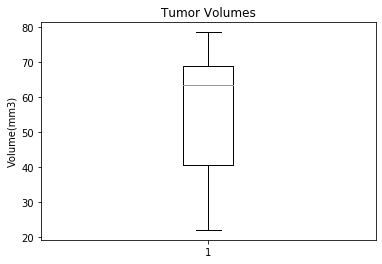

In [336]:
fin_tumor_bp=fin_tumor_df['Tumor Volume (mm3)']
fig1,ax1=plt.subplots()
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(fin_tumor_bp)
plt.show()

In [337]:
#Generate separate Box plots for 4 most promising Regimens
tumor_df=fin_tumor_df.reset_index()
tumor_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,g288,37.074024
3,Capomulin,g316,40.159220
4,Capomulin,i557,47.685963
...,...,...,...
125,Zoniferol,p136,63.488697
126,Zoniferol,q511,68.611061
127,Zoniferol,q633,70.827796
128,Zoniferol,s337,62.109651


In [338]:
#df for Capomulin
capom_tumor=tumor_df[tumor_df['Drug Regimen']=='Capomulin']
capom_tumor

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,g288,37.074024
3,Capomulin,g316,40.159220
4,Capomulin,i557,47.685963
5,Capomulin,i738,37.311846
6,Capomulin,j119,38.125164
7,Capomulin,l509,41.483008
8,Capomulin,l897,38.846876
9,Capomulin,m601,28.430964


In [339]:
#Calculate and print quartiles and possible outliers for Capomulin
quartile=capom_tumor.quantile([.25,.5,.75])
#quartile
lowerq=quartile.loc[0.25]
upperq=quartile.loc[0.75]
iqr=upperq-lowerq

In [340]:
print("Capomulin")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The the median of Tumor Volume is: {quartile.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin
The lower quartile is: Tumor Volume (mm3)    32.377357
Name: 0.25, dtype: float64
The upper quartile is: Tumor Volume (mm3)    40.15922
Name: 0.75, dtype: float64
The interquartile range: Tumor Volume (mm3)    7.781863
dtype: float64
The the median of Tumor Volume is: Tumor Volume (mm3)    37.311846
Name: 0.5, dtype: float64 
Values below Tumor Volume (mm3)    20.704562
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    51.832015
dtype: float64 could be outliers.


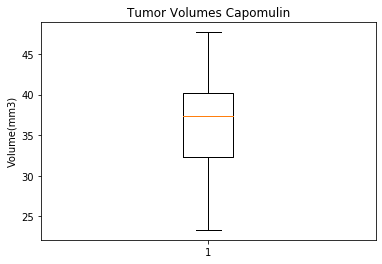

In [341]:
#Box plot for Capomulin

capom_bp=capom_tumor['Tumor Volume (mm3)']
#red_square=dict(markerfacecolor='r',marker='s')
fig1,ax1=plt.subplots()
ax1.set_title('Tumor Volumes Capomulin')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(capom_bp)
plt.show()

In [342]:
#df for Ramicane
ram_tumor=tumor_df[tumor_df['Drug Regimen']=='Ramicane']
ram_tumor

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
85,Ramicane,a411,38.407618
86,Ramicane,a444,43.047543
87,Ramicane,a520,38.810366
88,Ramicane,a644,32.978522
89,Ramicane,c758,33.397653
90,Ramicane,d251,37.311236
91,Ramicane,e662,40.659006
92,Ramicane,g791,29.128472
93,Ramicane,i177,33.562402
94,Ramicane,i334,36.374510


In [343]:
#Calculate and print quartiles and possible outliers for Ramicane
quartile=ram_tumor.quantile([.25,.5,.75])
#quartile
lowerq=quartile.loc[0.25]
upperq=quartile.loc[0.75]
iqr=upperq-lowerq

In [344]:
print("Ramicane")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The the median of Tumor Volume is: {quartile.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicane
The lower quartile is: Tumor Volume (mm3)    30.981175
Name: 0.25, dtype: float64
The upper quartile is: Tumor Volume (mm3)    38.508305
Name: 0.75, dtype: float64
The interquartile range: Tumor Volume (mm3)    7.52713
dtype: float64
The the median of Tumor Volume is: Tumor Volume (mm3)    34.848627
Name: 0.5, dtype: float64 
Values below Tumor Volume (mm3)    19.69048
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    49.799
dtype: float64 could be outliers.


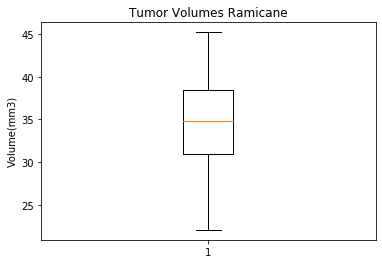

In [345]:
#Box plot for Ramicane
ram_bp=ram_tumor['Tumor Volume (mm3)']
fig1,ax1=plt.subplots()
ax1.set_title('Tumor Volumes Ramicane')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(ram_bp)
plt.show()

In [346]:
#df for Ceftamin
cef_tumor=tumor_df[tumor_df['Drug Regimen']=='Ceftamin']
cef_tumor

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
21,Ceftamin,a275,62.999356
22,Ceftamin,j296,61.849023
23,Ceftamin,k210,68.923185
24,Ceftamin,l471,67.748662
25,Ceftamin,l661,59.851956
26,Ceftamin,l733,64.299830
27,Ceftamin,o287,59.741901
28,Ceftamin,p438,61.433892
29,Ceftamin,w151,67.527482
30,Ceftamin,x581,64.634949


In [347]:
#Calculate and print quartiles and possible outliers for Ceftamin
quartile=cef_tumor.quantile([.25,.5,.75])
#quartile
lowerq=quartile.loc[0.25]
upperq=quartile.loc[0.75]
iqr=upperq-lowerq

In [348]:
print("Ceftamin")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The the median of Tumor Volume is: {quartile.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ceftamin
The lower quartile is: Tumor Volume (mm3)    61.433892
Name: 0.25, dtype: float64
The upper quartile is: Tumor Volume (mm3)    67.527482
Name: 0.75, dtype: float64
The interquartile range: Tumor Volume (mm3)    6.09359
dtype: float64
The the median of Tumor Volume is: Tumor Volume (mm3)    64.29983
Name: 0.5, dtype: float64 
Values below Tumor Volume (mm3)    52.293507
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    76.667868
dtype: float64 could be outliers.


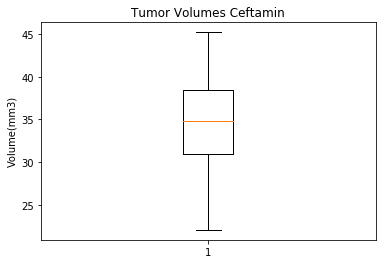

In [349]:
#Box plot for Ceftamin
cef_bp=ram_tumor['Tumor Volume (mm3)']
fig1,ax1=plt.subplots()
ax1.set_title('Tumor Volumes Ceftamin')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(cef_bp)
plt.show()

In [350]:
#df for Infubinol
inf_tumor=tumor_df[tumor_df['Drug Regimen']=='Infubinol']
inf_tumor

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
34,Infubinol,a203,67.973419
35,Infubinol,a251,65.525743
36,Infubinol,a685,66.083066
37,Infubinol,c139,72.226731
38,Infubinol,e476,62.435404
39,Infubinol,f345,60.918767
40,Infubinol,k483,66.196912
41,Infubinol,y163,67.685569
42,Infubinol,z581,62.754451


In [351]:
#Calculate and print quartiles and possible outliers for Infubinol
quartile=inf_tumor.quantile([.25,.5,.75])
#quartile
lowerq=quartile.loc[0.25]
upperq=quartile.loc[0.75]
iqr=upperq-lowerq

In [352]:
print("Infubinol")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The the median of Tumor Volume is: {quartile.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinol
The lower quartile is: Tumor Volume (mm3)    62.754451
Name: 0.25, dtype: float64
The upper quartile is: Tumor Volume (mm3)    67.685569
Name: 0.75, dtype: float64
The interquartile range: Tumor Volume (mm3)    4.931117
dtype: float64
The the median of Tumor Volume is: Tumor Volume (mm3)    66.083066
Name: 0.5, dtype: float64 
Values below Tumor Volume (mm3)    55.357776
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    75.082244
dtype: float64 could be outliers.


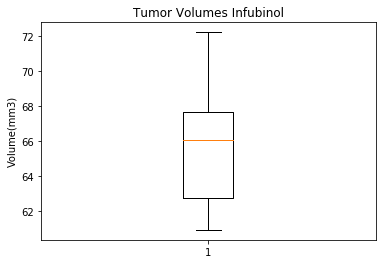

In [353]:
#Box plot for Infubinol
inf_bp=inf_tumor['Tumor Volume (mm3)']
fig1,ax1=plt.subplots()
ax1.set_title('Tumor Volumes Infubinol')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(inf_bp)
plt.show()

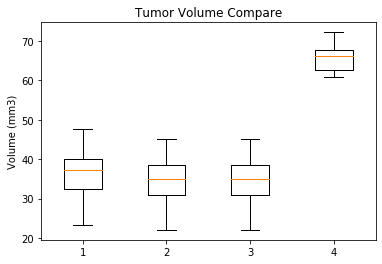

In [354]:
data=[capom_bp,ram_bp,cef_bp,inf_bp]
fig2,ax2=plt.subplots()
ax2.set_title('Tumor Volume Compare')
ax2.set_ylabel('Volume (mm3)')
ax2.boxplot(data,showfliers=True)
plt.show()

## Line and scatter plots

In [355]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [356]:
capom_df=df.loc[df['Drug Regimen']=='Capomulin']
capom_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [357]:
list2=capom_df['Mouse ID'].tolist()
#list2

In [358]:
rand_id=random.choice(list2)
#rand_id

In [359]:
capom_fin=capom_df.loc[capom_df['Mouse ID']==rand_id]

In [360]:
#capom_fin

In [361]:
capom_fin_plot=capom_fin[['Timepoint','Tumor Volume (mm3)']]
capom_fin_plot=capom_fin_plot.set_index('Timepoint')
#capom_fin_plot

Text(0.5, 1.0, 'Time point versus tumor volume')

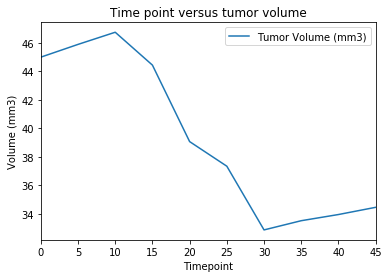

In [362]:
capom_fin_plot.plot()
plt.ylabel('Volume (mm3)')
plt.title('Time point versus tumor volume')

In [363]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#capom_fin_df=capom_df.groupby('Mouse ID')
#capom_fin_plot=capom_fin_plot.set_index('Timepoint')
#capom_fin_df

In [364]:
capom_weight=capom_df[['Mouse ID','Weight (g)']]
capom1=capom_weight.groupby('Mouse ID').first()
#capom_weight=capom_weight.set_index('Weight (g)')
#capom1

In [365]:
capom_volume=capom_df[['Mouse ID','Tumor Volume (mm3)']]
capom2=capom_volume.groupby('Mouse ID').mean()
capom2

,Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344
i557,44.805810
i738,39.141053
j119,44.465236
j246,43.216925


In [366]:
capom_plot=pd.merge(capom1,capom2,how='left',on=['Mouse ID'])
capom_plot

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


In [367]:
x_axis=capom_plot['Weight (g)']
y_axis=capom_plot['Tumor Volume (mm3)']

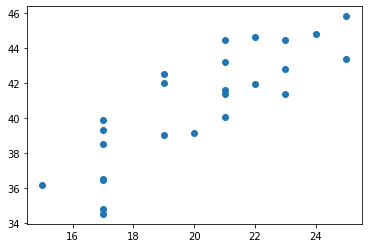

In [368]:
plt.scatter(x_axis,y_axis, marker="o")

In [369]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [370]:
capom_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [371]:
capom_corr_df=capom_df[['Mouse ID','Tumor Volume (mm3)']]
#capom_corr_df

In [372]:
capom_vol_gr=capom_corr_df.groupby('Mouse ID').mean()
capom_vol_gr

,Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344
i557,44.805810
i738,39.141053
j119,44.465236
j246,43.216925


In [373]:
capom_wt_df=capom_df[['Mouse ID','Weight (g)']]
#capom_wt_df

In [374]:
capom_wt_gr=capom_wt_df.groupby('Mouse ID').first()
capom_wt_gr

,Weight (g)
Mouse ID,
b128,22
b742,21
f966,17
g288,19
g316,22
i557,24
i738,20
j119,23
j246,21


In [375]:
v1=capom_vol_gr.reset_index()


In [376]:
w1=capom_wt_gr.reset_index()


In [377]:
v_w=pd.merge(v1,w1,how='left',on='Mouse ID')


In [378]:
v2=v_w.iloc[:,1]


In [379]:
w2=v_w.iloc[:,2]

In [380]:
correlation=st.pearsonr(v2,w2)
print(f"The correlation between both factors is{round(correlation[0],2)}")

The correlation between both factors is0.84


The r-square is:0.8419363424694718


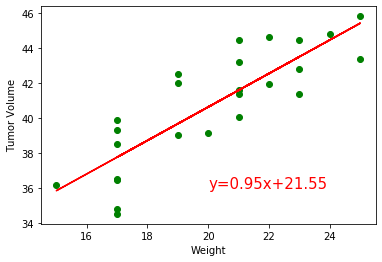

In [381]:
#Linear regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(w2,v2)
regress_values=w2*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(w2,v2,color='g')
plt.plot(w2,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.ylabel('Tumor Volume')
plt.xlabel('Weight')
print(f"The r-square is:{rvalue}")
#plt.scatter(x_axis,y_axis, marker="o")
plt.show()